<a href="https://colab.research.google.com/github/Naveen112001/Ml-Project/blob/master/Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as n

In [ ]:
#!unzip "drive/My Drive/Dogvision/dog-breed-identification.zip" -d "drive/My Drive/Dogvision/"

In [ ]:
# End TO End Multi class Classification Project




# Note Book Overview
This Note Book consists of End to End Project based on the 
TensorFlow 2.0 Multi class Classification Project.

## 1.Project
Identifying the Breed of the Given Dog image.

## 2. Data
The Data are from  the Kaggle and Also the Link of the Data set is Provided Below:
https://www.kaggle.com/c/dog-breed-identification/data

## 3.Evaluation
 Evaluated Based on Multi Class Log Loss between the predicted probability and the observed target.
 Some Information of about the data


*   Dealing with the Image Data
*   Deep learning this was about the Unstructured data
*   There are 120 breeds of dogs this means Different Kind of classification classes
*   There around 10000+ images in training test(having labels)
*   There is areund 10000+ images in test sets(having no labels)












In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
print("Temsor Flow Version"+tf.__version__)

Temsor Flow Version2.3.0


In [5]:
try:
  %tensorflow_version 2.x
except Exception:
  pass



In [6]:
print("TensorFlow"+tf.__version__+" Tensorflowhub"+hub.__version__)

TensorFlow2.3.0 Tensorflowhub0.8.0


In [7]:
print("GPU","Availability" if tf.config.list_physical_devices("GPU") else "Not available")

GPU Availability


In [8]:
device=tf.test.gpu_device_name()
print(device)

/device:GPU:0


In [9]:
lable_csv=pd.read_csv("drive/My Drive/Dogvision/labels.csv")

In [10]:
lable_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,21b5e0496a130df8779281813e071bfd,scottish_deerhound
freq,1,126


In [11]:
lable_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


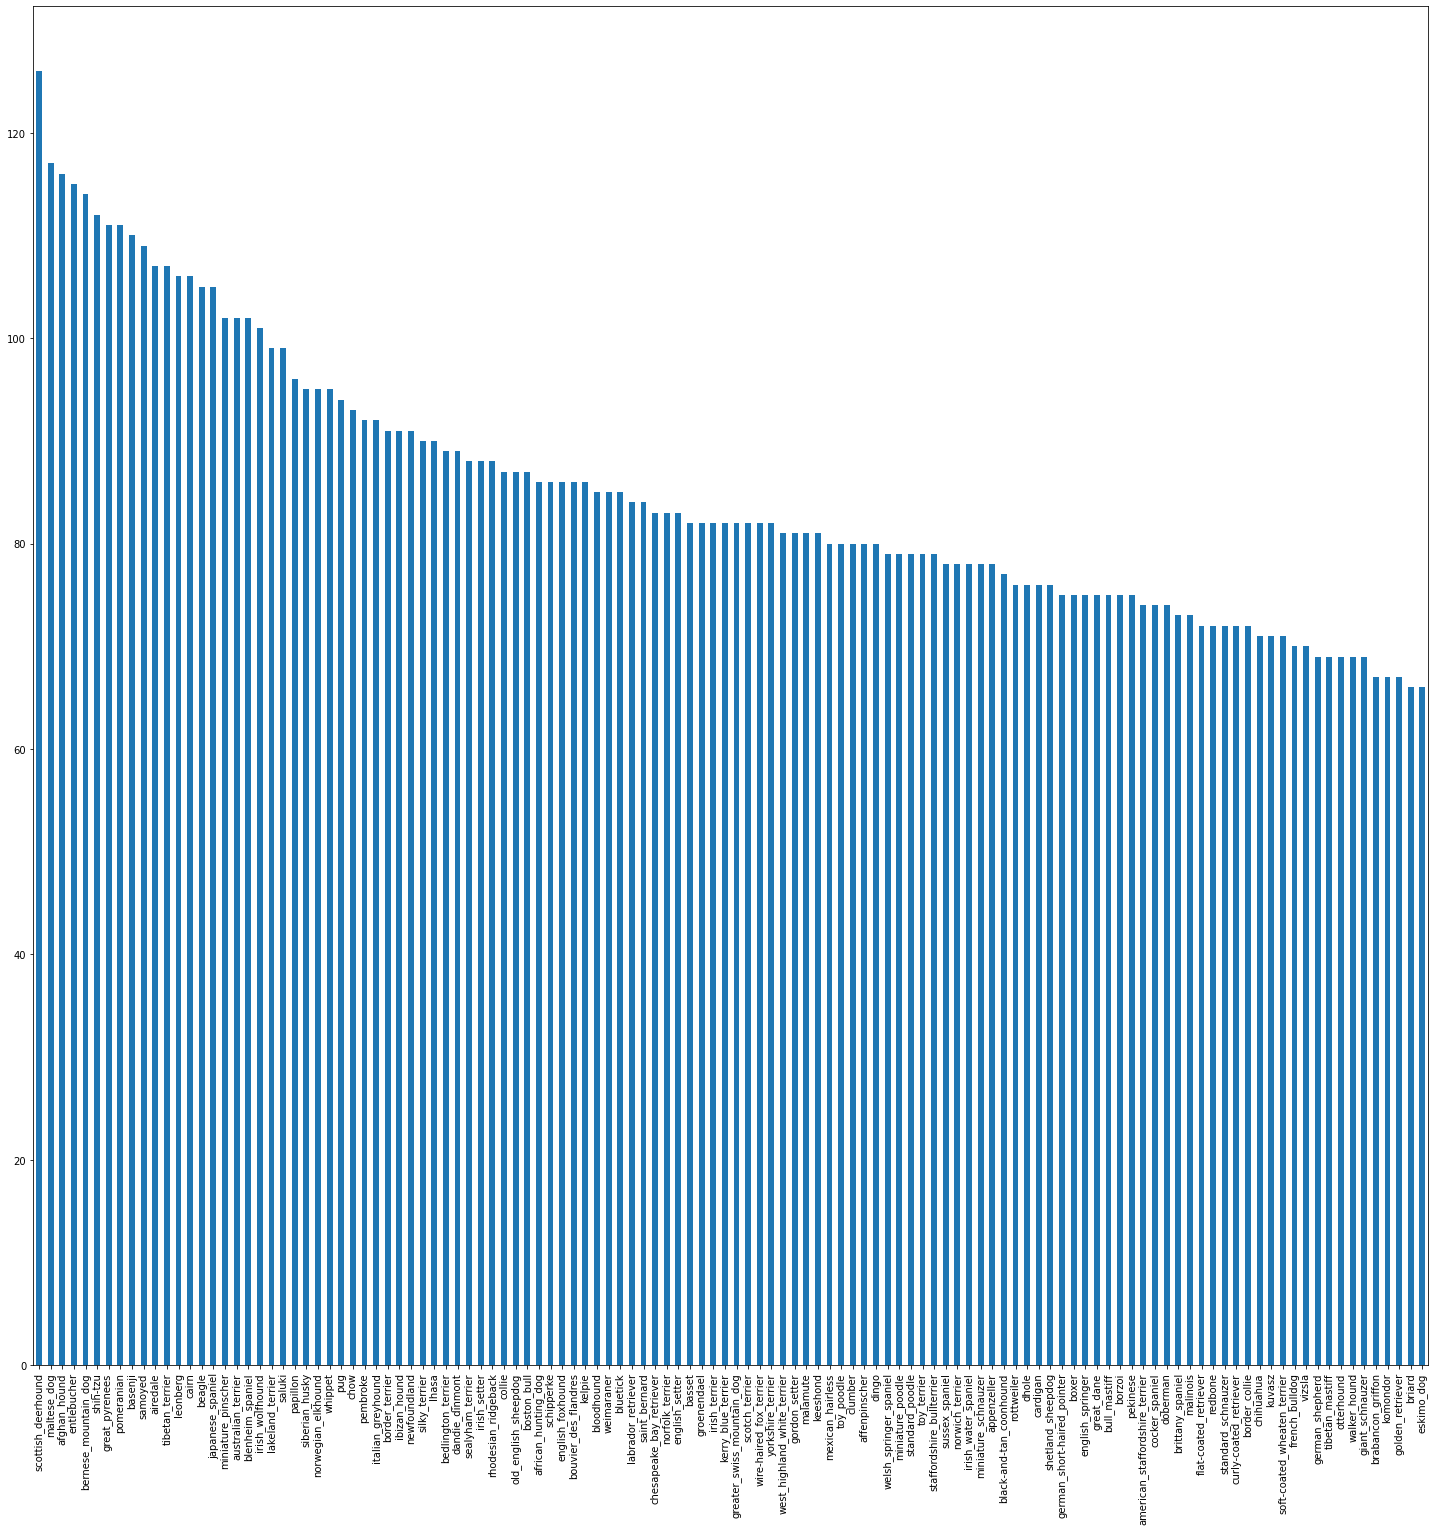

In [12]:
lable_csv["breed"].value_counts().plot.bar(figsize=(25,25));

In [13]:
lable_csv["breed"].value_counts().median()

82.0

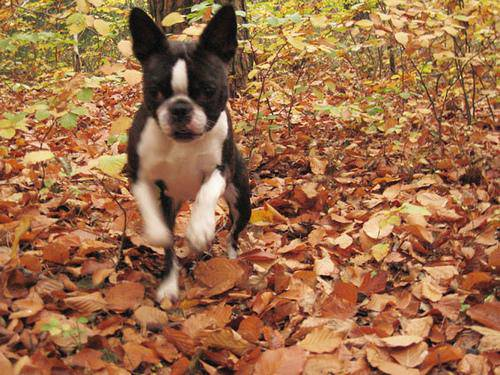

In [14]:
from IPython.display import Image
Image("drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [15]:
file_path=["drive/My Drive/Dogvision/train/"+fname+".jpg" for fname in lable_csv["id"]]

In [16]:
file_path[:10]

['drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [17]:
labels=lable_csv["breed"].to_numpy()

In [18]:
unique_breeds=n.unique(labels)

In [19]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
if len(labels) == len(file_path):
  print("Number Labels matches Number of File_path")
else:
  print("Not Matching")

Number Labels matches Number of File_path


In [21]:
x=file_path

In [22]:
y=labels

In [23]:
x

['drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dogvision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dogvision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dogvision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dogvision/train/006cc3ddb9dc1bd827479569fcdc52d

In [24]:
len(y)

10222

In [25]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dogvision/train/")) == len(file_path):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [26]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [27]:
# Setup X & y variables
X = file_path
y = boolean_labels

In [28]:
len(labels)

10222

In [29]:
print(labels[0])
print(n.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [30]:
labels[0]

'boston_bull'

In [31]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [32]:
Image()

ValueError: ignored

In [ ]:
Image("drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000}

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_val),len(y_train),len(y_val)

In [ ]:
x_train[:10]

In [ ]:
y_val[:2][:10]

 ## PreProcessing The Images into tensors
 Turning the Images into Tensors using Function
